In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [24]:
df = pd.read_csv('sales_data python.csv')
print(df.head())

         Date  Store     Category  Units_Sold  Unit_Price
0  2024-01-01    101  Electronics          30      299.99
1  2024-01-01    102     Clothing          45       49.99
2  2024-01-01    103   Home Goods          20       19.99
3  2024-01-02    101  Electronics          25      299.99
4  2024-01-02    102     Clothing          50       49.99


In [25]:
df.shape

(55, 5)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        55 non-null     object 
 1   Store       55 non-null     int64  
 2   Category    55 non-null     object 
 3   Units_Sold  55 non-null     int64  
 4   Unit_Price  55 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ KB


In [27]:
df.describe()

,Store,Units_Sold,Unit_Price
count,55.000000,55.000000,55.000000
mean,102.018182,35.309091,121.444545
std,0.827556,13.046743,126.292110
min,101.000000,15.000000,19.990000
25%,101.000000,25.500000,19.990000
50%,102.000000,32.000000,49.990000
75%,103.000000,43.500000,299.990000
max,103.000000,62.000000,299.990000


In [28]:
df.columns.to_list()

['Date', 'Store', 'Category', 'Units_Sold', 'Unit_Price']

In [29]:
df.isnull().sum()

Date          0
Store         0
Category      0
Units_Sold    0
Unit_Price    0
dtype: int64

In [30]:
#valores duplicados
df.nunique()

Date          19
Store          3
Category       3
Units_Sold    24
Unit_Price     3
dtype: int64

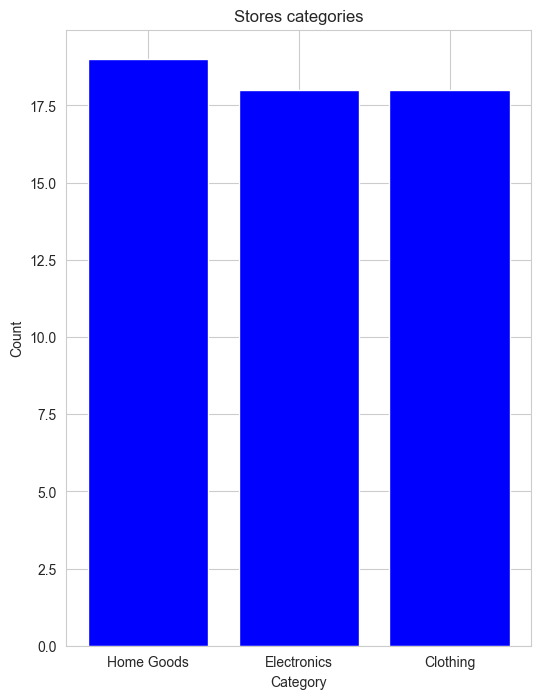

In [31]:
#plot the categories

categories_counts = df['Category'].value_counts()

plt.figure(figsize=(6,8))
plt.bar(categories_counts.index, categories_counts,color='b')
plt.title("Stores categories")
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

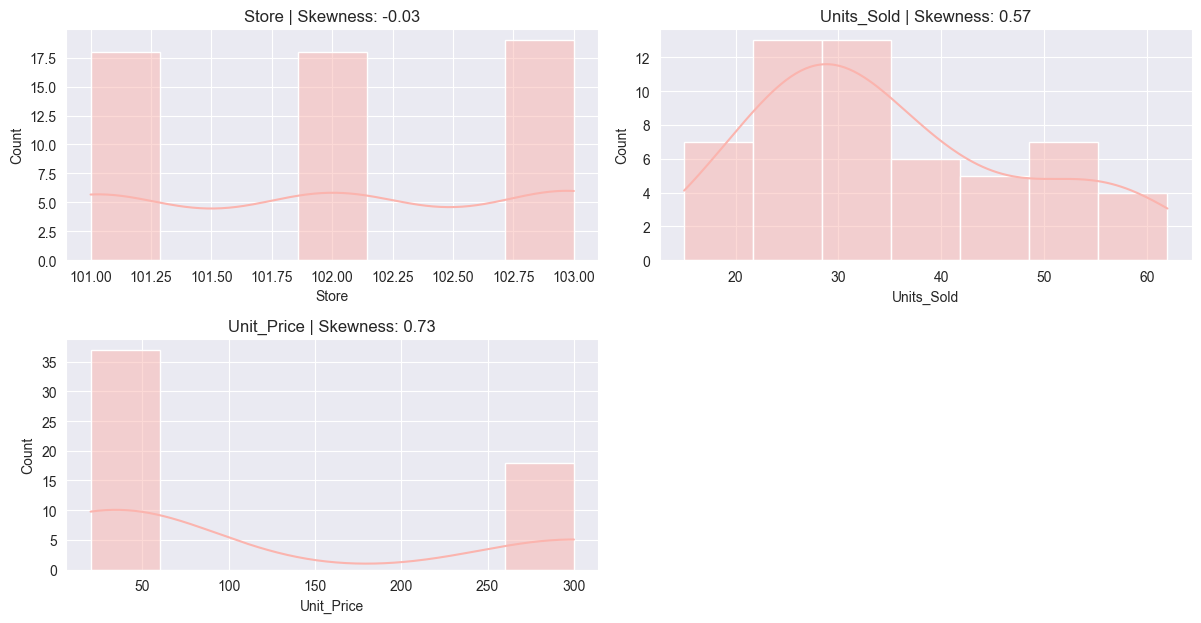

In [32]:
#kernel de densidad para comprender la varianza en el dataset
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(12, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

         Date  Store     Category  Units_Sold  Unit_Price
0  2024-01-01    101  Electronics          30      299.99
1  2024-01-01    102     Clothing          45       49.99
2  2024-01-01    103   Home Goods          20       19.99
3  2024-01-02    101  Electronics          25      299.99
4  2024-01-02    102     Clothing          50       49.99


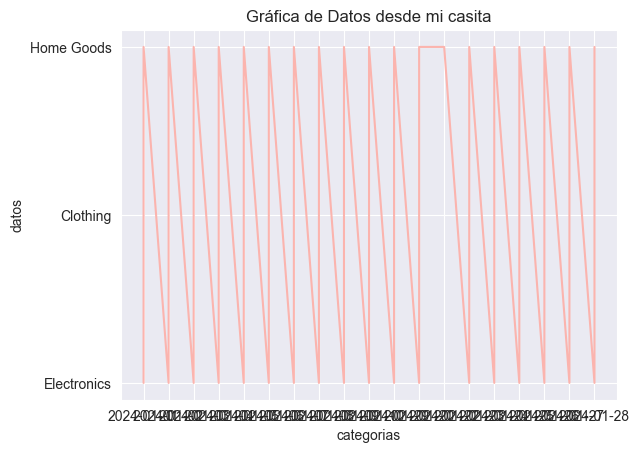

In [33]:


# Cargar el archivo Excel
archivo = "sales_data python.csv"  # Cambia esta ruta con la ubicación de tu archivo
df = pd.read_csv(archivo)

# Ver las primeras filas del archivo para entender su estructura
print(df.head())

# Supongamos que las columnas que queremos graficar son 'A' y 'B'
# Si los nombres de las columnas son diferentes, ajústalos según tu archivo
x = df['Date']  # Cambia 'A' con el nombre de la columna de tu eje X
y = df['Category']  # Cambia 'B' con el nombre de la columna de tu eje Y


# Crear la gráfica
plt.plot(x, y)

# Etiquetas y título
plt.xlabel('categorias')
plt.ylabel('datos')
plt.title('Gráfica de Datos desde mi casita')

# Mostrar la gráfica
plt.show()


In [34]:
import pandas as pd

# Cargar el archivo CSV
archivo = ''"sales_data python.csv"  # Cambia esta ruta con la ubicación de tu archivo CSV
df = pd.read_csv(archivo)

# Seleccionar una fila específica (por ejemplo, la fila con índice 5)
fila = df.iloc[100]  # Cambia 5 por el índice de la fila que quieras

# Mostrar la fila seleccionada
print(fila)


IndexError: single positional indexer is out-of-bounds

In [ ]:
import pandas as pd

# Cargar el archivo CSV
archivo = ''"sales_data python.csv"# Cambia esta ruta con la ubicación de tu archivo CSV
df = pd.read_csv(archivo)


filtro = df[df['Date'] == '"sales_data python.csv"']


print(filtro)


Empty DataFrame
Columns: [Date, Store, Category, Units_Sold, Unit_Price]
Index: []


In [ ]:
# Filtrar las filas y obtener solo la primera
resultado = filtro.head(1)

# Mostrar el resultado
print(resultado)


Empty DataFrame
Columns: [Date, Store, Category, Units_Sold, Unit_Price]
Index: []


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        55 non-null     datetime64[ns]
 1   Store       55 non-null     int64         
 2   Category    55 non-null     object        
 3   Units_Sold  55 non-null     int64         
 4   Unit_Price  55 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.3+ KB


In [92]:
import plotly.express as px
import pandas as pd
archivo="sales_data python.csv"
df=pd.read_csv(archivo)
print(df.head())
df['Date'] = pd.to_datetime(df['Date'])
fig = px.line(df, x='Date', y="Units_Sold",color='Category')
fig.show()


         Date  Store     Category  Units_Sold  Unit_Price
0  2024-01-01    101  Electronics          30      299.99
1  2024-01-01    102     Clothing          45       49.99
2  2024-01-01    103   Home Goods          20       19.99
3  2024-01-02    101  Electronics          25      299.99
4  2024-01-02    102     Clothing          50       49.99


In [93]:
import pandas as pd

# Cargar el archivo CSV
archivo = "sales_data python.csv"  # Cambia esta ruta con la ubicación de tu archivo CSV
df = pd.read_csv(archivo)

# Verificar si hay filas duplicadas
duplicados = df[df.duplicated()]

# Mostrar las filas duplicadas
print("Filas duplicadas:")
print(duplicados)

# También puedes ver cuántas filas están duplicadas
cantidad_duplicados = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {cantidad_duplicados}")


Filas duplicadas:
Empty DataFrame
Columns: [Date, Store, Category, Units_Sold, Unit_Price]
Index: []
Cantidad de filas duplicadas: 0


In [94]:
# Eliminar las filas duplicadas y conservar solo la primera ocurrencia
df_sin_duplicados = df.drop_duplicates()

# Guardar el DataFrame sin duplicados en un nuevo archivo CSV (opcional)
df_sin_duplicados.to_csv("sales_data python.csv", index=False)

# Mostrar el DataFrame sin duplicados
print(df_sin_duplicados)


          Date  Store     Category  Units_Sold  Unit_Price
0   2024-01-01    101  Electronics          30      299.99
1   2024-01-01    102     Clothing          45       49.99
2   2024-01-01    103   Home Goods          20       19.99
3   2024-01-02    101  Electronics          25      299.99
4   2024-01-02    102     Clothing          50       49.99
5   2024-01-02    103   Home Goods          30       19.99
6   2024-01-03    101  Electronics          40      299.99
7   2024-01-03    102     Clothing          55       49.99
8   2024-01-03    103   Home Goods          25       19.99
9   2024-01-04    101  Electronics          35      299.99
10  2024-01-04    102     Clothing          60       49.99
11  2024-01-04    103   Home Goods          15       19.99
12  2024-01-05    101  Electronics          28      299.99
13  2024-01-05    102     Clothing          42       49.99
14  2024-01-05    103   Home Goods          18       19.99
15  2024-01-06    101  Electronics          32      299.

In [95]:
import plotly.express as px
import pandas as pd
archivo="sales_data python.csv"
df=pd.read_csv(archivo)
print(df.head())
df['Date'] = pd.to_datetime(df['Date'])
fig = px.line(df, x='Date', y="Units_Sold",color='Category')
fig.show()


         Date  Store     Category  Units_Sold  Unit_Price
0  2024-01-01    101  Electronics          30      299.99
1  2024-01-01    102     Clothing          45       49.99
2  2024-01-01    103   Home Goods          20       19.99
3  2024-01-02    101  Electronics          25      299.99
4  2024-01-02    102     Clothing          50       49.99


In [96]:
import pandas as pd

# Cargar el archivo CSV
archivo = "sales_data python.csv" # Cambia esta ruta con la ubicación de tu archivo CSV
df = pd.read_csv(archivo)

# Asegúrate de que la columna de fechas esté en formato datetime
df['Date'] = pd.to_datetime(df['Date'])  # Cambia 'Date' al nombre exacto de tu columna de fechas

# Ordenar los datos por la columna 'Date' en orden ascendente
df_ordenado_asc = df.sort_values(by='Date', ascending=True)

# Mostrar los datos ordenados
print(df_ordenado_asc)



         Date  Store     Category  Units_Sold  Unit_Price
0  2024-01-01    101  Electronics          30      299.99
1  2024-01-01    102     Clothing          45       49.99
2  2024-01-01    103   Home Goods          20       19.99
3  2024-01-02    101  Electronics          25      299.99
4  2024-01-02    102     Clothing          50       49.99
5  2024-01-02    103   Home Goods          30       19.99
6  2024-01-03    101  Electronics          40      299.99
7  2024-01-03    102     Clothing          55       49.99
8  2024-01-03    103   Home Goods          25       19.99
9  2024-01-04    101  Electronics          35      299.99
10 2024-01-04    102     Clothing          60       49.99
11 2024-01-04    103   Home Goods          15       19.99
14 2024-01-05    103   Home Goods          18       19.99
13 2024-01-05    102     Clothing          42       49.99
12 2024-01-05    101  Electronics          28      299.99
15 2024-01-06    101  Electronics          32      299.99
16 2024-01-06 

In [97]:
import plotly.express as px
import pandas as pd
fig = px.line(df_ordenado_asc, x='Date', y="Units_Sold",color='Category')
fig.show()

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')
print(df.head())


        Date  Store     Category  Units_Sold  Unit_Price
0 2024-01-01    101  Electronics          30      299.99
1 2024-01-01    102     Clothing          45       49.99
2 2024-01-01    103   Home Goods          20       19.99
3 2024-01-02    101  Electronics          25      299.99
4 2024-01-02    102     Clothing          50       49.99


In [112]:
df.shape



(55, 5)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        55 non-null     datetime64[ns]
 1   Store       55 non-null     int64         
 2   Category    55 non-null     object        
 3   Units_Sold  55 non-null     int64         
 4   Unit_Price  55 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.3+ KB


In [114]:
df.describe()

,Date,Store,Units_Sold,Unit_Price
count,55,55.000000,55.000000,55.000000
mean,2024-01-14 10:02:10.909090816,102.018182,35.309091,121.444545
min,2024-01-01 00:00:00,101.000000,15.000000,19.990000
25%,2024-01-05 00:00:00,101.000000,25.500000,19.990000
50%,2024-01-10 00:00:00,102.000000,32.000000,49.990000
75%,2024-01-25 00:00:00,103.000000,43.500000,299.990000
max,2024-01-29 00:00:00,103.000000,62.000000,299.990000
std,NaN,0.827556,13.046743,126.292110


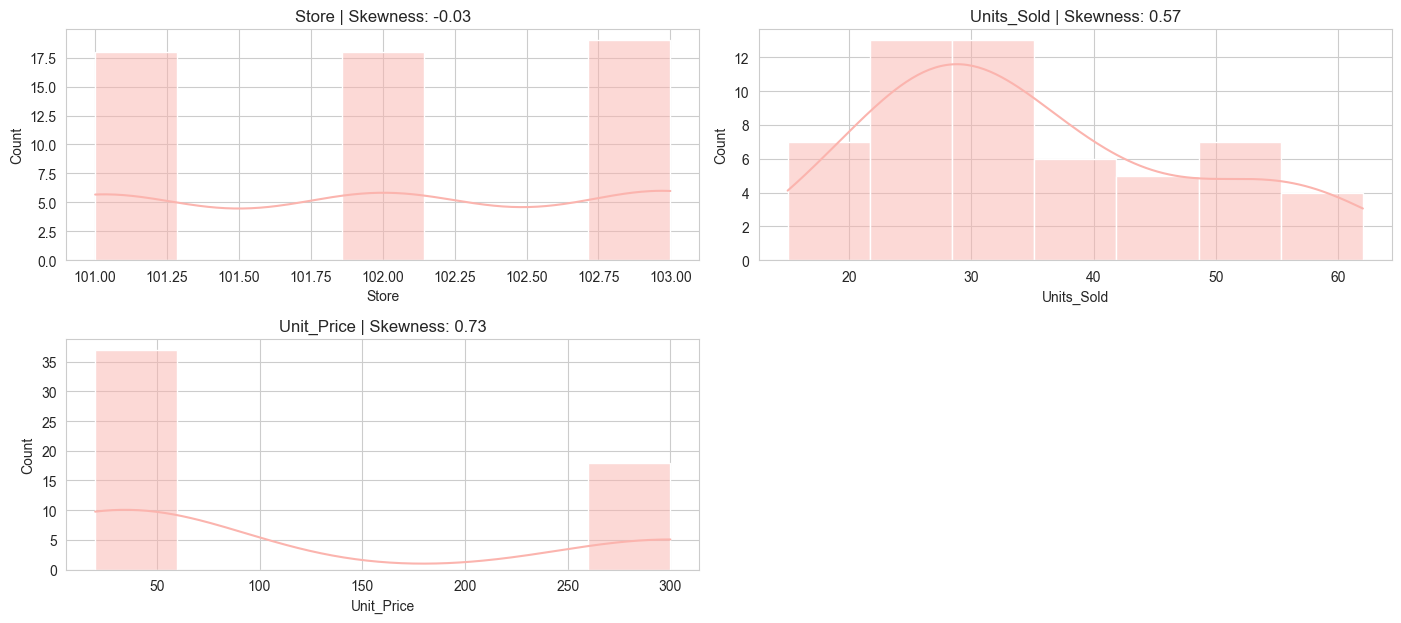

In [162]:
sns.set_style("whitegrid")

numerical_columns = df_sin_duplicados.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df_sin_duplicados[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()




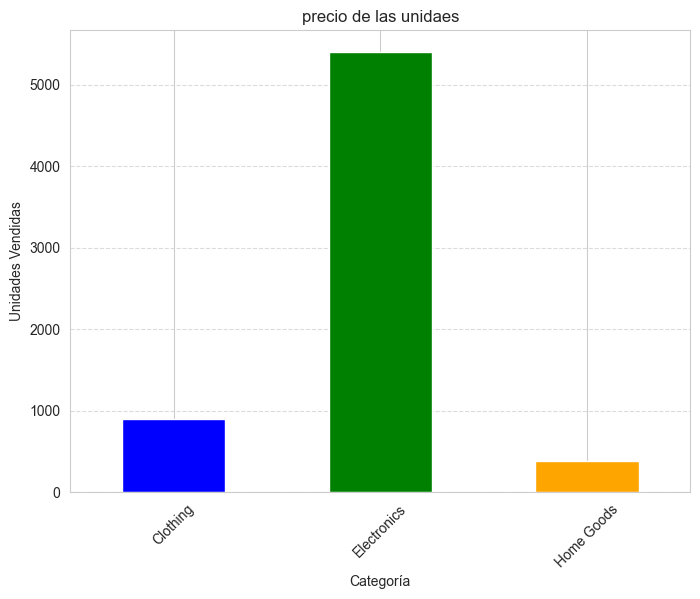

In [174]:
# Agrupar los datos por categoría y sumar las unidades vendidas
category_units = df.groupby('Category')['Unit_Price'].sum()

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
category_units.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('precio de las unidaes')
plt.xlabel('Categoría')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

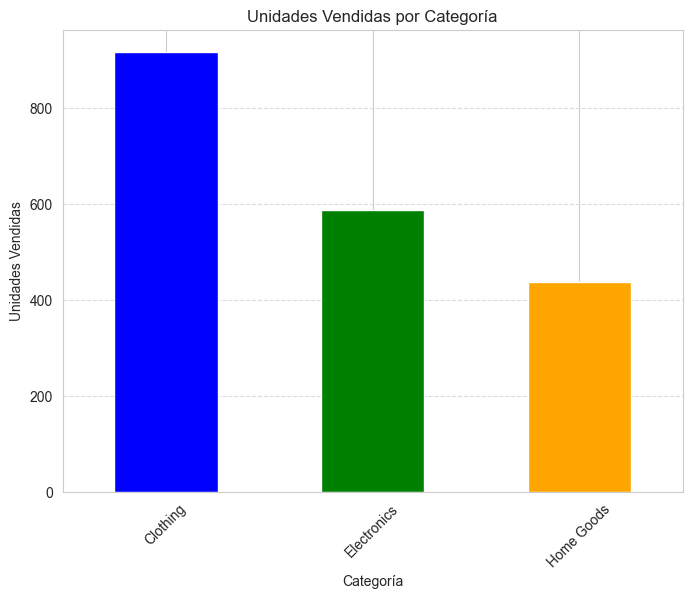

In [175]:
# Agrupar los datos por categoría y sumar las unidades vendidas
category_units = df.groupby('Category')['Units_Sold'].sum()

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
category_units.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Unidades Vendidas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

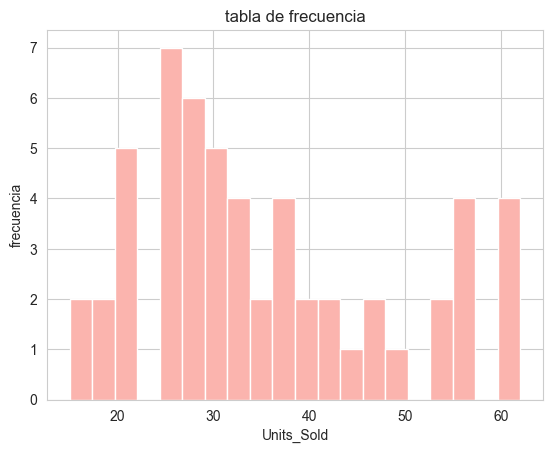

In [181]:
plt.hist(df_ordenado_asc['Units_Sold'],bins=20)
plt.xlabel('Units_Sold')
plt.ylabel('frecuencia')
plt.title('tabla de frecuencia')
plt.show()

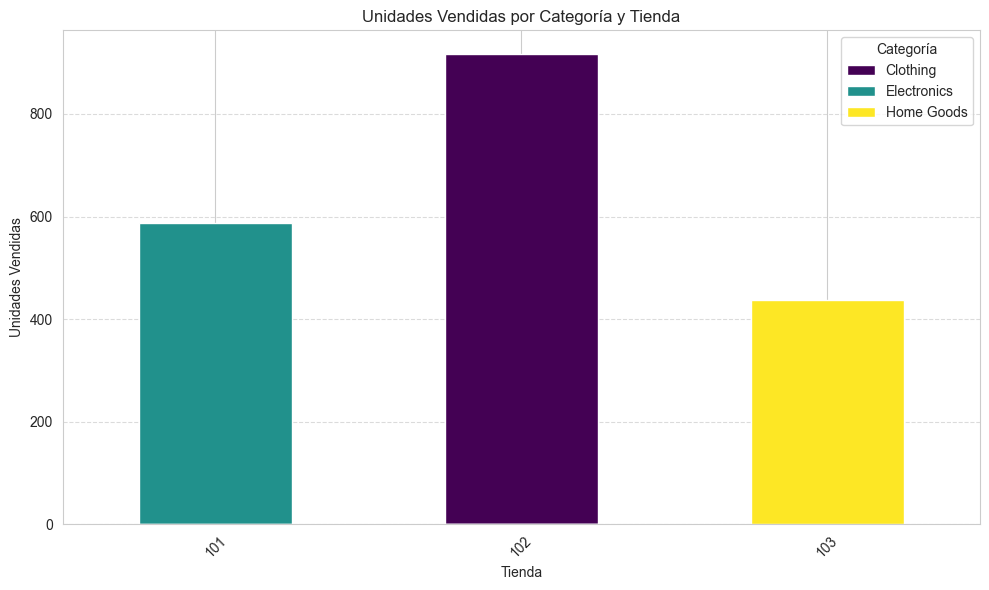

In [182]:
# Crear un gráfico de barras apiladas para mostrar las unidades vendidas por categoría y tienda
pivot_data = df.pivot_table(index='Store', columns='Category', values='Units_Sold', aggfunc='sum')

# Crear el gráfico
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Etiquetas y título
plt.title('Unidades Vendidas por Categoría y Tienda')
plt.xlabel('Tienda')
plt.ylabel('Unidades Vendidas')
plt.legend(title='Categoría')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [183]:
import plotly.express as px
import pandas as pd
fig = px.line(df_ordenado_asc, x='Date', y="Unit_Price",color='Category')
fig.show()

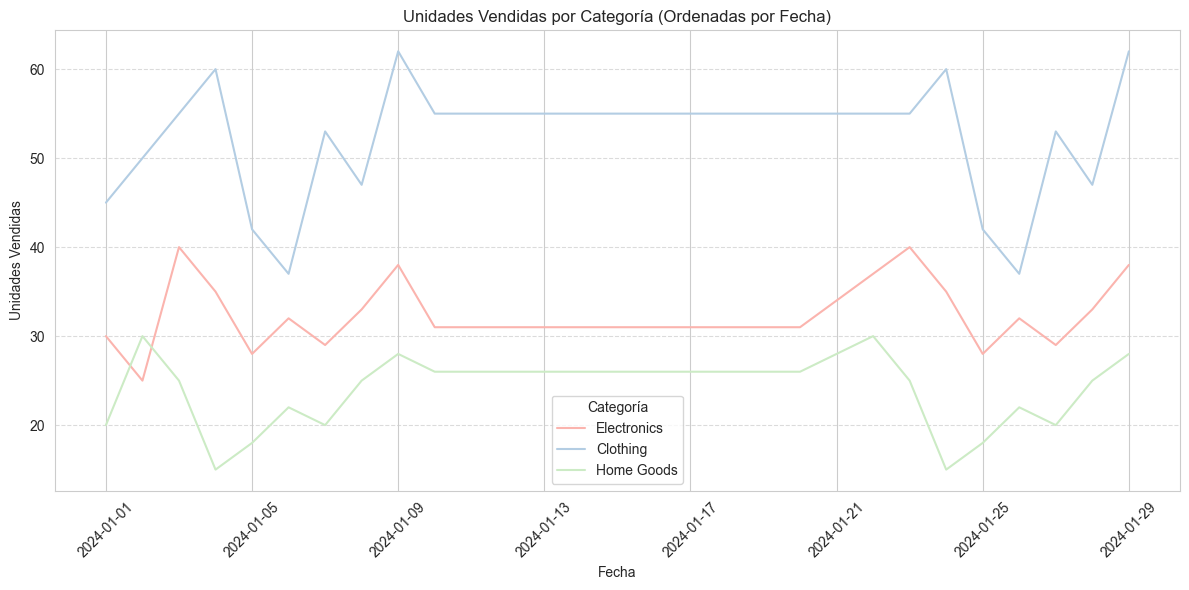

In [184]:
# Asegúrate de que los datos estén ordenados por la columna 'Date'
df_ordenado_asc.sort_values(by='Date')

# Crear la gráfica
plt.figure(figsize=(12, 6))
for category in df_ordenado_asc['Category'].unique():
    subset = df_ordenado_asc[df_ordenado_asc['Category'] == category]
    plt.plot(subset['Date'], subset['Units_Sold'], label=category)

# Etiquetas y título
plt.title('Unidades Vendidas por Categoría (Ordenadas por Fecha)')
plt.xlabel('Fecha')
plt.ylabel('Unidades Vendidas')
plt.legend(title='Categoría')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [185]:
import plotly.express as px
import pandas as pd
fig = px.line(df_ordenado_asc, x='Date', y="Units_Sold",color='Category')
fig.show()